In [72]:
%%capture
! git clone https://github.com/harshRaj2017/Automatic-Licence-Plate-Recognition.git

In [73]:
%load_ext autoreload
%autoreload 2
%cd Automatic-Licence-Plate-Recognition/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/content/Automatic-Licence-Plate-Recognition/Automatic-Licence-Plate-Recognition/Automatic-Licence-Plate-Recognition/Automatic-Licence-Plate-Recognition/Automatic-Licence-Plate-Recognition


In [74]:
import sys
sys.path.insert(1, '/content/Automatic-Licence-Plate-Recognition/src')

In [79]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2

from utils import get_random_plate, display
from classifier import ReadPlate
from perspective_transform import perspectiveTransform
from segmentation import segment_characters

readPlate = ReadPlate(
    digits_path = 'models/digits-v6-20.h5',
    alphabets_path='models/alphabets-v6.h5',
    all36_path='models/all36-v6-20.h5',
)

def segmentAndReadPlate(
    plate=None,
    clahe_clipLimit=3,
    clahe_tileGridSize=16,
    erosion_iters=1,
    dilation_iters=1,
    do_perspective_transform=True,
    verbose=1,
    return_results=False,
):

    if plate is None:
        plate = get_random_plate()
    elif type(plate)==str:
        plate = cv2.imread(plate)

    if verbose>=3:
        display(plate)

    if do_perspective_transform:
        plate = perspectiveTransform(
            plate,
            clahe_clipLimit=3,
            clahe_tileGridSize=16,
            erosion_iters=0,
            dilation_iters=5,
            show_contours = verbose>=3,
            show_corners = verbose>=3,
        )

    char = segment_characters(
        plate,plate_name="indian_plate",
        clahe_clipLimit=clahe_clipLimit,
        clahe_tileGridSize=clahe_tileGridSize,
        erosion_iters=erosion_iters,
        dilation_iters=dilation_iters,
        display_verbose=verbose,
    )
    fixed_char, preds = readPlate.predict_char(char)

    if verbose>=3:
        print(len(fixed_char), len(preds))

    if verbose>=1:
        plt.figure()
        for i in range(len(fixed_char)):
            fig = plt.subplot(1, len(fixed_char), i+1)
            fig.imshow(fixed_char[i], cmap=plt.cm.binary)
            fig.set_title(preds[i])
            fig.axis('off')
        plt.show()
    if return_results:
        return preds

In [80]:
seq_configs = [
    {"clahe_clipLimit":3, "erosion_iters":1, "dilation_iters":1, "clahe_tileGridSize":16, "do_perspective_transform":True},
    {"clahe_clipLimit":1, "erosion_iters":1, "dilation_iters":3, "clahe_tileGridSize":16, "do_perspective_transform":True},
    {"clahe_clipLimit":3, "erosion_iters":1, "dilation_iters":5, "clahe_tileGridSize":16, "do_perspective_transform":True},
]

def completePipeline(plate):
    best_res = 0
    for i in range(len(seq_configs)):
        res = segmentAndReadPlate(plate, verbose=0, return_results=True, **seq_configs[i])
        if 9<=len(res)<=11:
            best_res = i
            break
    # print(f"best_res idx: {best_res}")
    return segmentAndReadPlate(plate, verbose=1, return_results=True, **seq_configs[best_res])

In [81]:
test_images = glob('test_pics/t*.png')
test_images = sorted(test_images, key=lambda x:int(x.split('.')[-2].split('t')[-1]))
print(len(test_images))

17


test_pics/t1.png


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 28ms/step


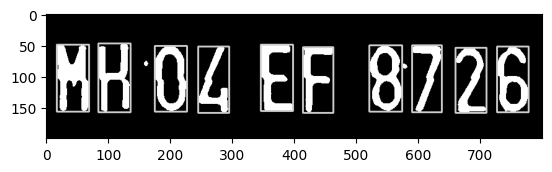

1/1 [==============================] - 0s 27ms/step


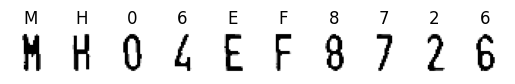

**************************************************




test_pics/t2.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 26ms/step


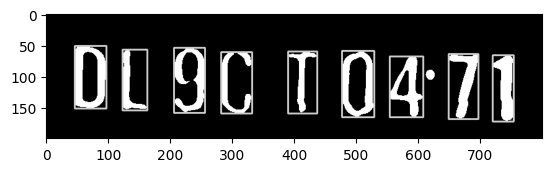

1/1 [==============================] - 0s 26ms/step


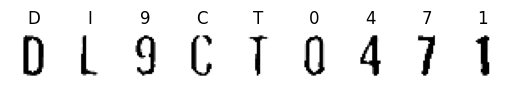

**************************************************




test_pics/t4.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 29ms/step


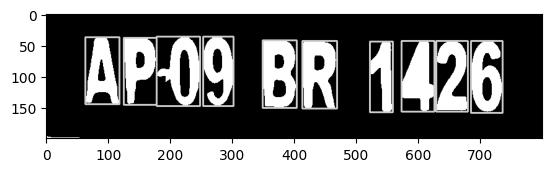

1/1 [==============================] - 0s 28ms/step


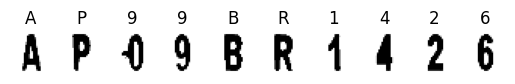

**************************************************




test_pics/t5.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

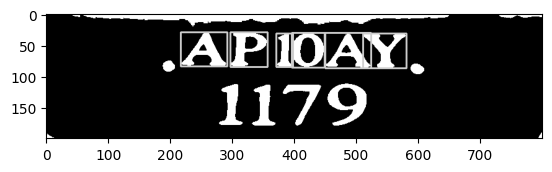

1/1 [==============================] - 0s 27ms/step


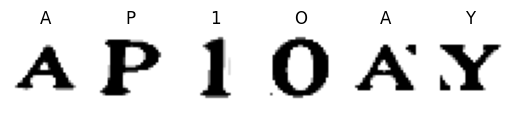

**************************************************




test_pics/t6.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 28ms/step


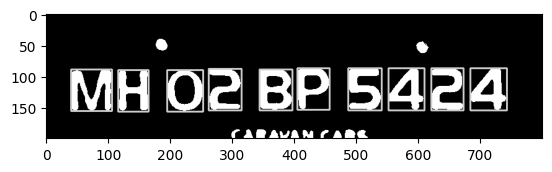

1/1 [==============================] - 0s 25ms/step


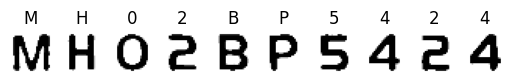

**************************************************




test_pics/t7.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 26ms/step


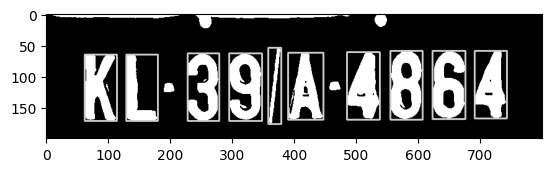

1/1 [==============================] - 0s 32ms/step


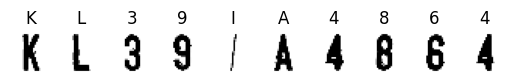

**************************************************




test_pics/t8.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 38ms/step


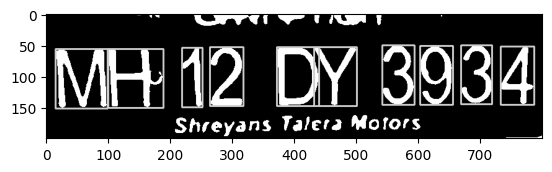

1/1 [==============================] - 0s 26ms/step


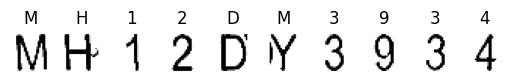

**************************************************




test_pics/t9.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 23ms/step


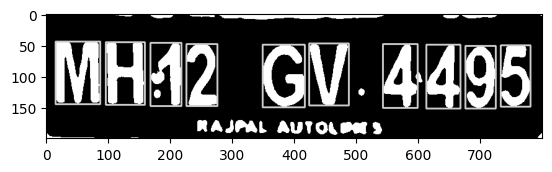

1/1 [==============================] - 0s 31ms/step


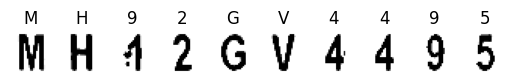

**************************************************




test_pics/t10.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 26ms/step


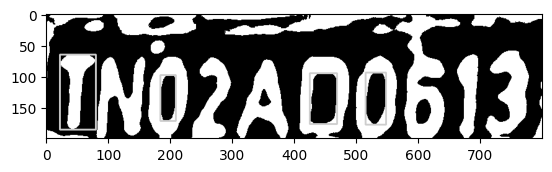

1/1 [==============================] - 0s 28ms/step


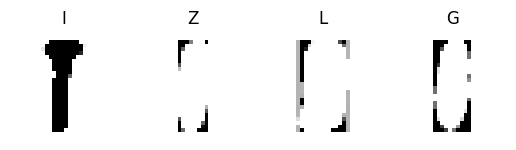

**************************************************




test_pics/t11.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 25ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 24ms/step


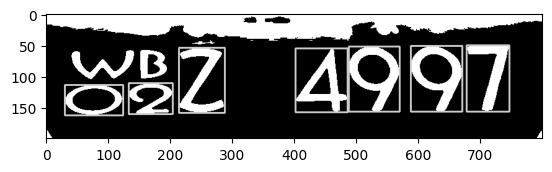

1/1 [==============================] - 0s 27ms/step


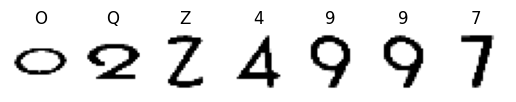

**************************************************




test_pics/t12.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 23ms/step


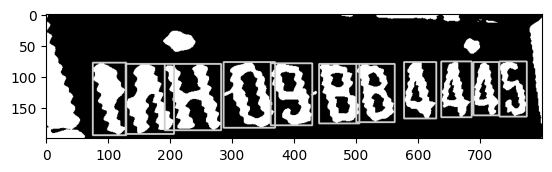

1/1 [==============================] - 0s 23ms/step


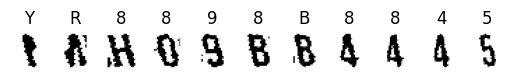

**************************************************




test_pics/t13.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 26ms/step


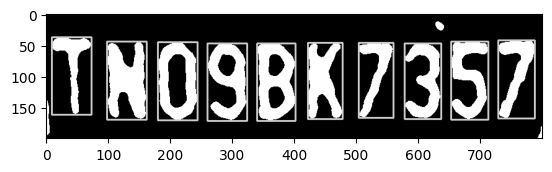

1/1 [==============================] - 0s 23ms/step


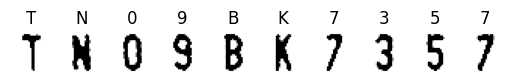

**************************************************




test_pics/t14.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 51ms/step


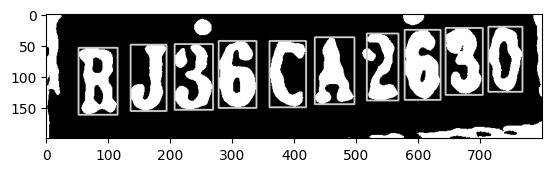

1/1 [==============================] - 0s 28ms/step


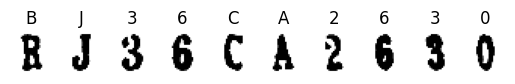

**************************************************




test_pics/t15.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 32ms/step


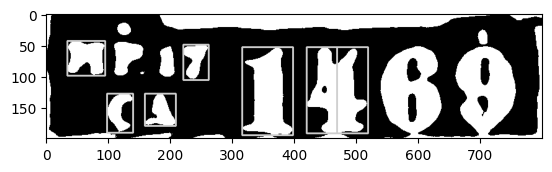

1/1 [==============================] - 0s 29ms/step


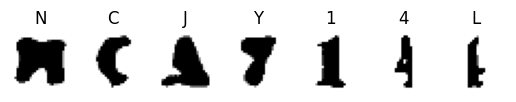

**************************************************




test_pics/t16.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 35ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 24ms/step


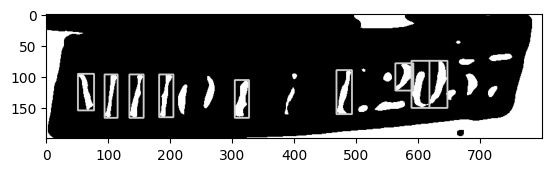

1/1 [==============================] - 0s 40ms/step


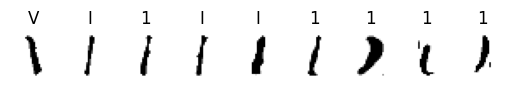

**************************************************




test_pics/t18.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 25ms/step


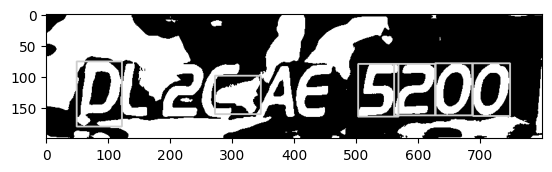

1/1 [==============================] - 0s 30ms/step


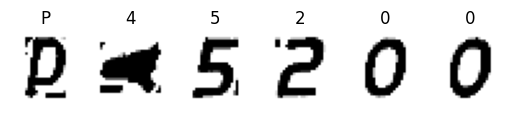

**************************************************




test_pics/t19.png


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 27ms/step


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 24ms/step


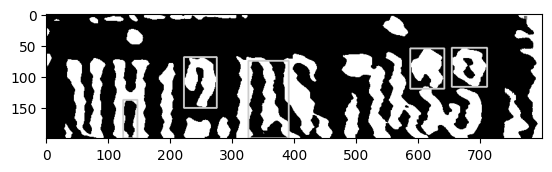

1/1 [==============================] - 0s 25ms/step


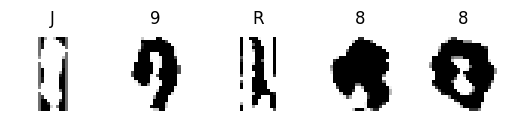

**************************************************






In [82]:
for plate in test_images:

  print(plate)
  pred = completePipeline(plate)
  print('*'*50+'\n'*4)